In [2]:
from fastai.text.all import *
path = untar_data(URLs.IMDB)

In [3]:
files = get_text_files('Dataset/WikiText/data')

In [4]:
txt = files[100].open().read(); txt[30:-1]

'കളിൽ ഒന്നാണ് മകൗ . ഹോങ്കോങ് ആണ് മറ്റേത് . പേൾ നദീതടത്തിന്റെ പടിഞ്ഞാറൻ ഭാഗത്താണ് മഹൗ സ്ഥിതി ചെയ്യുന്നത് . വടക്ക് ഗുവാങ്ഡൊങ് പ്രവിശ്യയും കിഴക്കും തെക്കും തെക്കൻ ചൈന കടലുമാണ് ഇതിന്റെ അതിരുകൾ . കാന്റൺ നദി ദക്ഷിണചൈനാസമുദ്രത്തിൽ പതിക്കുന്നതിനു സമീപമാണിത് . \nപതിനാറാം ശതകം മുതൽ ഒരു പോർച്ചുഗീസ് അധീനപ്രദേശം ആയിരുന്നു ഇത്.1990 ലെ ഭരണഘടനപ്രകാരം രാഷ്ട്രീയ സ്വയംഭരണം ലഭിച്ചു.\nഈ പ്രദേശത്തിന്റെ സാമ്പത്തികാവസ്ഥ പ്രധാനമായും ചൂതാട്ടത്തിലും ടൂറിസത്തിലും ഊന്നിയുള്ളതാണ് . വാണിജ്യ ഉത്പാദന കേന്ദ്രങ്ങളുമുണ്ട് . തുണിത്തരങ്ങൾ, ഇലക്ക്ട്രോണിക്സ്, കളിപ്പാട്ടം എന്നിവയുടെ മികച്ച വ്യവസായങ്ങൾ ഇവിടെയുണ്ട് . വിനോദസഞ്ചാരത്തിലും മുന്നിട്ട് നിൽക്കുന്നു . അനേകം ഹോട്ടലുകൾ, റിസോർട്ടുകൾ, സ്റ്റേഡിയങ്ങൾ, റെസ്റ്റൊറാന്റുകൾ, ചൂതാട്ടകേന്ദ്രങ്ങൾ എന്നിവ ഈ നഗരത്തിൽ പ്രവർത്തിക്കുന്നു.'

In [3]:
path = 'Dataset/WikiText/data'
get_texts = partial(get_text_files)

dls_lm = DataBlock(
    blocks=TextBlock.from_folder(path, is_lm=True),
    get_items=get_texts, splitter=RandomSplitter(0.1)
).dataloaders(path, path=path, bs=80, seq_len=20)

In [5]:
dls_lm.show_batch(max_n=2)

,text,text_
0,xxbos xxunk മലയാള ഭാഷയിലെ ഒരു വൃത്തമാണ് . \n ‎അഘഹരണം• ‎അചലധൃതി• ‎അജഗരഗമനം• ‎അതിരുചിര• അതിരുചിരം• അതിരുചിരം• ‎അതിമുദിതം• ‎അതിസമ്മത• ‎അതിസ്തിമിത• ‎അനപായം• അനുഷ്ടുപ്പ്• ‎അനംഗശേഖരം•,xxunk മലയാള ഭാഷയിലെ ഒരു വൃത്തമാണ് . \n ‎അഘഹരണം• ‎അചലധൃതി• ‎അജഗരഗമനം• ‎അതിരുചിര• അതിരുചിരം• അതിരുചിരം• ‎അതിമുദിതം• ‎അതിസമ്മത• ‎അതിസ്തിമിത• ‎അനപായം• അനുഷ്ടുപ്പ്• ‎അനംഗശേഖരം• ‎അന്നനട•
1,അവാർഡ് ലഭിച്ചിട്ടുണ്ട് . xxbos പ്രഗല്ഭ ആണവ ശാസ്ത്രജ്ഞനും ഇന്ത്യയിലെ xxunk എനർജി xxunk ബോർഡിന്റെ മുൻ xxunk ഡോ . എ. ഗോപാലകൃഷ്ണൻ . xxunk,ലഭിച്ചിട്ടുണ്ട് . xxbos പ്രഗല്ഭ ആണവ ശാസ്ത്രജ്ഞനും ഇന്ത്യയിലെ xxunk എനർജി xxunk ബോർഡിന്റെ മുൻ xxunk ഡോ . എ. ഗോപാലകൃഷ്ണൻ . xxunk xxunk


In [4]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.5, 
    metrics=[accuracy, Perplexity()], pretrained=False).to_fp16()

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.0030199517495930195)

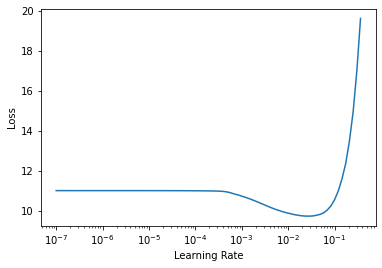

In [7]:
learn.lr_find()

In [13]:
learn.fit(30, 2.9e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,7.167313,7.151900,0.229333,1276.528809,13:21
1,5.778377,6.111674,0.297648,451.093140,13:28
2,5.425362,5.620929,0.329215,276.145874,13:21
3,4.793969,4.955151,0.372848,141.904037,13:22
4,4.381094,4.580797,0.408788,97.592117,13:19
5,4.158104,4.402090,0.422709,81.621246,13:20
6,3.916116,4.300414,0.431230,73.730286,13:08
7,3.746299,4.159586,0.439183,64.044998,13:06
8,3.630838,4.073390,0.445173,58.755779,13:05
9,3.506808,4.002523,0.453105,54.736099,13:06


In [17]:
learn.predict('ഇത്', 50)

'ഇത് നടപ്പിൽ നേതൃത്വം കൊടുക്കുന്ന ഒരു പാട്ട് ആണ് . തടവുശിക്ഷ ജ്ഞാനം ഭയം പൊതുവെ അല്ലെങ്കിൽ മംഗളം പോലെയുള്ള മറ്റു മേഖലകളിലും ഭൗതികശാസ്ത്രം , ആമുഖം എന്നിവിടങ്ങളിലും സാധാരണ ഗതിയിൽ ആകർഷിക്കുന്നു . ഓട്ടോമൻ രാജവംശത്തിനു വേണ്ടിയായിരുന്നു ഇവരുടെ കാലം . ഇസ്ലാം എന്നർത്ഥമുള്ള മിക്ക നിബന്ധനകൾ സാധ്യമാകുന്ന ഉപയോഗിക്കുന്നുണ്ട് , മിക്ക രീതിയിലുമുള്ള മതപരിവർത്തനം നൽകി നൃത്തം കട്ട . എന്നാൽ , ഈദ് ലൂതർ ബി .'

In [22]:
learn.save('Wikimodel')

Path('Dataset/WikiText/data/models/Wikimodel.pth')

In [19]:
learn = learn.load('Wikimodel')

In [29]:
learn.predict('ഞാൻ അവിടെ', 1)

'ഞാൻ അവിടെ മുഴുവൻ'

In [54]:
learn.export(Path.cwd()/'Model.pth')